In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# load input data - Source: Open Power System Data (OPSD)
opsd_url = "https://data.open-power-system-data.org/time_series/2020-10-06/time_series_60min_singleindex.csv"

df = pd.read_csv(opsd_url, parse_dates=["utc_timestamp"], index_col="utc_timestamp")
df.shape

,cet_cest_timestamp,AT_load_actual_entsoe_transparency,AT_load_forecast_entsoe_transparency,AT_price_day_ahead,AT_solar_generation_actual,AT_wind_onshore_generation_actual,BE_load_actual_entsoe_transparency,BE_load_forecast_entsoe_transparency,BE_solar_generation_actual,BE_wind_generation_actual,...,SI_load_actual_entsoe_transparency,SI_load_forecast_entsoe_transparency,SI_solar_generation_actual,SI_wind_onshore_generation_actual,SK_load_actual_entsoe_transparency,SK_load_forecast_entsoe_transparency,SK_solar_generation_actual,SK_wind_onshore_generation_actual,UA_load_actual_entsoe_transparency,UA_load_forecast_entsoe_transparency
utc_timestamp,,,,,,,,,,,,,,,,,,,,,
2014-12-31 23:00:00+00:00,2015-01-01T00:00:00+0100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-01 00:00:00+00:00,2015-01-01T01:00:00+0100,5946.0,6701.0,35.0,NaN,69.0,9484.0,9897.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-01 01:00:00+00:00,2015-01-01T02:00:00+0100,5726.0,6593.0,45.0,NaN,64.0,9152.0,9521.0,NaN,734.81,...,1045.47,816.0,NaN,1.17,2728.0,2860.0,3.8,NaN,NaN,NaN
2015-01-01 02:00:00+00:00,2015-01-01T03:00:00+0100,5347.0,6482.0,41.0,NaN,65.0,8799.0,9135.0,NaN,766.64,...,1004.79,805.0,NaN,1.04,2626.0,2810.0,3.8,NaN,NaN,NaN
2015-01-01 03:00:00+00:00,2015-01-01T04:00:00+0100,5249.0,6454.0,38.0,NaN,64.0,8567.0,8909.0,NaN,733.13,...,983.79,803.0,NaN,1.61,2618.0,2780.0,3.8,NaN,NaN,NaN


In [3]:
# select relevant columns
df = df[[
    "DE_load_actual_entsoe_transparency",
    "DE_solar_generation_actual",
    "DE_wind_onshore_generation_actual",
    "DE_wind_offshore_generation_actual",
    "DE_LU_price_day_ahead"
]].copy()

# rename columns 
df.columns = [
    "load", "solar", "wind_onshore", "wind_offshore", "price_day_ahead"
]

In [4]:
# create wind total and drop missing values
df["wind_total"] = df["wind_onshore"] + df["wind_offshore"]

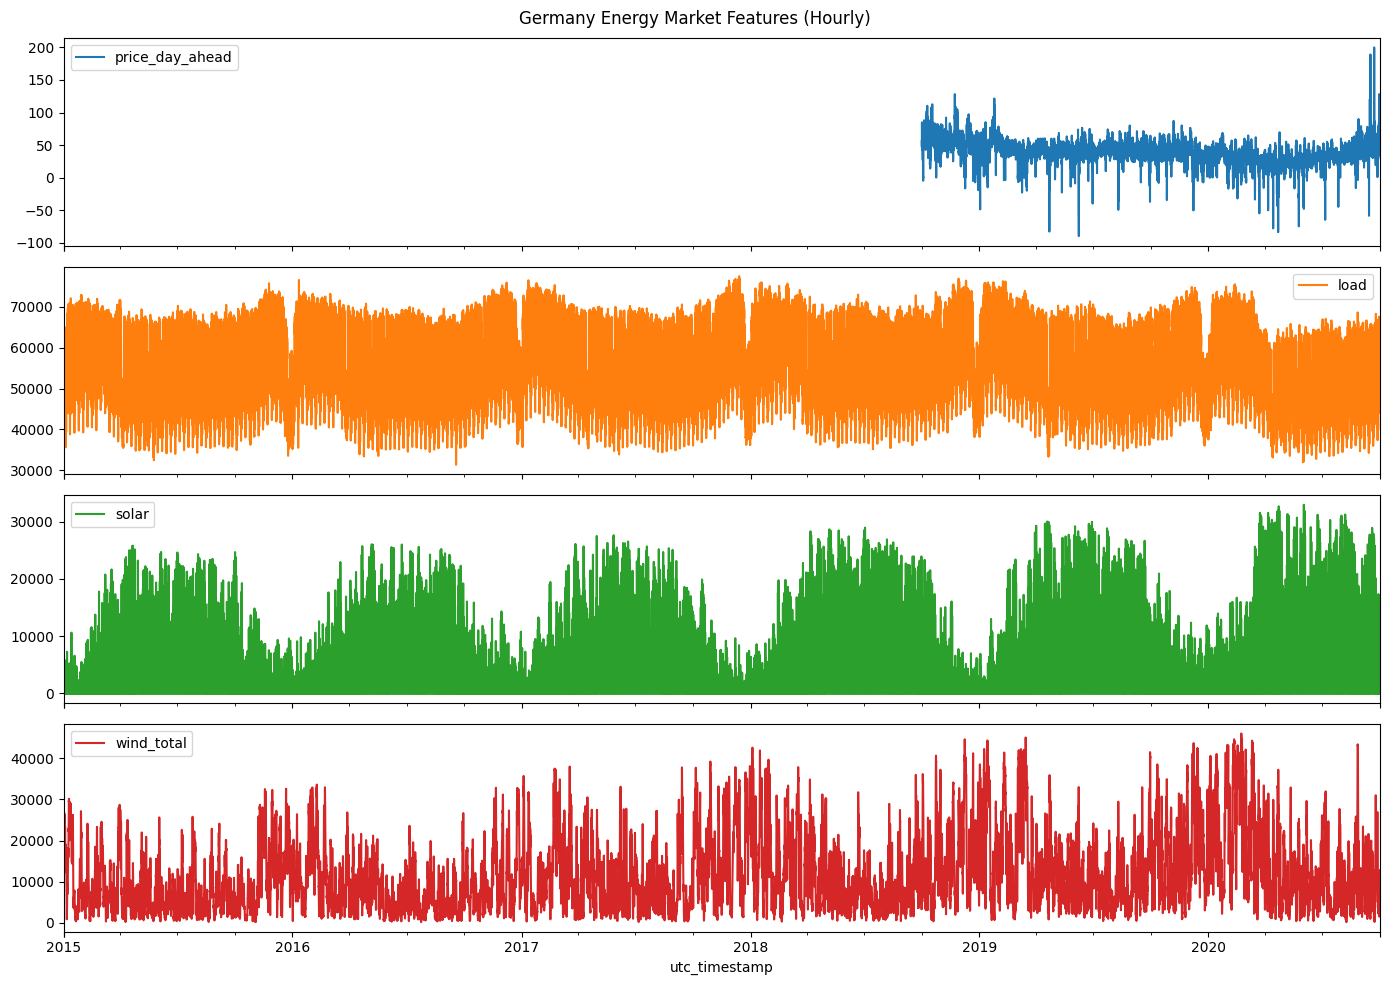

In [5]:
# quick plot to inspect data
df[["price_day_ahead", "load", "solar", "wind_total"]].plot(
    subplots=True, figsize=(14, 10), title="Germany Energy Market Features (Hourly)"
)
plt.tight_layout()
plt.show()

In [11]:
DATA_PATH = "../data/opsd_energy_market_data.csv"  # from notebooks/
df.to_csv(DATA_PATH)

In [12]:
df.head()

,load,solar,wind_onshore,wind_offshore,price_day_ahead,wind_total
utc_timestamp,,,,,,
2014-12-31 23:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-01 00:00:00+00:00,41151.0,NaN,8336.0,517.0,NaN,8853.0
2015-01-01 01:00:00+00:00,40135.0,NaN,8540.0,514.0,NaN,9054.0
2015-01-01 02:00:00+00:00,39106.0,NaN,8552.0,518.0,NaN,9070.0
2015-01-01 03:00:00+00:00,38765.0,NaN,8643.0,520.0,NaN,9163.0
